# Introdução

## OpInf

A equação afim do Opinf é descrita como:
$$\dot{\mathbf{x}}(t)=\mathbf{Ax}(t)+\mathbf{Bu}(t)$$
Onde:
- $\mathbf{x}(t)$ é o vetor de estados de dimensão **n**,
- $\mathbf{u}(t)$ é o vetor de sinal de entrada de dimensão **p**,
- $[\mathbf{A},\mathbf{B}]$ são as matrizes **n**x**n** e **n**x**p** a serem determinadas.

Para determinar as matrizes $[\mathbf{A},\mathbf{B}]$ utilizamos nós minimizamos o valor do resíduo, $Res=\dot{\mathbf{x}}(t)-\mathbf{Ax}(t)-\mathbf{Bu}(t)$. Para isso usamos a norma 2 e definimos a função objetivo como sendo:
$$FO(\mathbf{x}(t))=\|\dot{\mathbf{x}}(t)-\mathbf{Ax}(t)-\mathbf{Bu}(t)\|^2_2$$
Assumindo que temos $k+1$ passos de tempo, e que para cada tempo temos um vetor de estado correspondente, as matrizes $[\mathbf{A},\mathbf{B}]$ a serem detereminadas são aquelas que minimizam o erro para todos os passos de tempo, ou seja:
$$FO(\mathbf{X})=\|\dot{\mathbf{x}}(t=1)-\mathbf{Ax}(t=1)-\mathbf{Bu}(t=1)\|^2_2+\cdots+\|\dot{\mathbf{x}}(t=k)-\mathbf{Ax}(t=k)-\mathbf{Bu}(t=k)\|^2_2$$
$$FO(\mathbf{X})=\|\dot{\mathbf{X}}-\mathbf{AX}-\mathbf{BU}\|^2_F$$
Onde o índice "F" indica a norma de Frobenius e as novas matrizes $\mathbf{X}_{n\times k}$ e $\mathbf{U}_{p\times k}$ são compostas por todos os vetores de estado $\mathbf{x}$ e vetores de entrada $\mathbf{u}$ na forma:
$$\mathbf{X}=\begin{bmatrix}\mathbf{x}(t=1)&\mathbf{x}(t=2)&\cdots&\mathbf{x}(t=k)\end{bmatrix}$$
$$\mathbf{U}=\begin{bmatrix}\mathbf{u}(t=1)&\mathbf{u}(t=2)&\cdots&\mathbf{u}(t=k)\end{bmatrix}$$

O resíduo para todos os passos de tempo pode ser rescrito como:
$$Res=\dot{\mathbf{X}}-\mathbf{AX}-\mathbf{BU}=\begin{bmatrix}\mathbf{A}&\mathbf{B}\end{bmatrix}\begin{bmatrix}\mathbf{X}\\\mathbf{U}\end{bmatrix}=\mathbf{O}\boldsymbol{\Gamma}$$
Onde:
- $\mathbf{O}=\begin{bmatrix}\mathbf{A}&\mathbf{B}\end{bmatrix}$
- $\boldsymbol{\Gamma}=\begin{bmatrix}\mathbf{X}\\\mathbf{U}\end{bmatrix}$.
Assim, a função objetivo pode ser reescrita como:
$$\boxed{FO(\mathbf{X})=\|\dot{\mathbf{X}}-\mathbf{O}\boldsymbol{\Gamma}\|^2_F}$$

ou
$$FO(\mathbf{X})=\|\dot{\mathbf{X}}^T-\boldsymbol{\Gamma}^T\mathbf{O}^T\|^2_F$$
que é um problema do tipo "AX=B" e pode ser resolvida por mínimos quadrados.

## Redução de Ordem

Como geralmente as matrizes são muito grandes e nem toda informação que carregam é relevante para o estudo, podendo ter muito ruído, é interessante extrair somente os dados mais relevantes. Para isso iremos usar uma projeção dos dados num novo sistema onde as bases serão obtidas pela decomposição em valores singulares (SVD) da matriz de estados. Esta projeção é conhecida como POD (proper orthogonal decomposition).
$$\mathbf{X}=\boldsymbol{\Phi\Sigma}\mathbf{V}^T$$

A nova base $\boldsymbol{\Phi}_r$ é definida como sendo as primeiras "r" colunas de $\boldsymbol{\Phi}$ que correspondem aos maiores valores singulares.
$$\boldsymbol{\Phi}_r=\boldsymbol{\Phi}[:,:r]$$
Onde $r\leq \min{(n,k)}$

As novas projeções serão:
$$\mathbf{X}_r=\boldsymbol{\Phi}_r^T\mathbf{X}$$
Com isso, a equação original de espaço de estados fica:
$$\boldsymbol{\Phi}_r\dot{\mathbf{X}}_r=\mathbf{A}\boldsymbol{\Phi}_r\mathbf{X}_r+\mathbf{BU}$$
Lembrando que $\boldsymbol{\Phi}_r^T\boldsymbol{\Phi}_r=\mathbf{I}$, então pré-multiplicamos a equação por $\boldsymbol{\Phi}_r^T$:
$$\boldsymbol{\Phi}_r^T\boldsymbol{\Phi}_r\dot{\mathbf{X}}_r=\boldsymbol{\Phi}_r^T\mathbf{A}\boldsymbol{\Phi}_r\mathbf{X}_r+\boldsymbol{\Phi}_r^T\mathbf{BU}$$
$$\dot{\mathbf{X}}_r=(\boldsymbol{\Phi}_r^T\mathbf{A}\boldsymbol{\Phi}_r)\mathbf{X}_r+(\boldsymbol{\Phi}_r^T\mathbf{B})\mathbf{U}$$
$$\boxed{\dot{\mathbf{X}}_r=\mathbf{A}_r\mathbf{X}_r+\mathbf{B}_r\mathbf{U}}$$
onde:
- $\mathbf{A}_r=\boldsymbol{\Phi}_r^T\mathbf{A}\boldsymbol{\Phi}_r$,
- $\mathbf{B}_r=\boldsymbol{\Phi}_r^T\mathbf{B}$.

E a solução é obtida da mesma forma que anteriormente, mas usando as matrizes reduzidas:


## Calculando novos vetores de estado

Uma vez que as matrizes $\mathbf{A}_r$ e $\mathbf{B}_r$ já foram inferidas, vamos calcular os novos vetores de estado usando o método implicito de primeira ordem do tipo:
$$\dot{\mathbf{x}}_r=\mathbf{A}_r\mathbf{x}_r+\mathbf{B}_r\mathbf{u}$$
$$\frac{\mathbf{x}_r^{k+1}-\mathbf{x}_r^{k}}{\Delta t}=\mathbf{A}_r\mathbf{x}_r^{k+1}+\mathbf{B}_r\mathbf{u}$$
$$(\mathbf{I}-\Delta t\mathbf{A}_r)\mathbf{x}_r^{k+1}=\mathbf{x}_r^{k}+\Delta t\mathbf{B}_r\mathbf{u}$$
$$\boxed{\mathbf{x}_r^{k+1}=(\mathbf{I}-\Delta t\mathbf{A}_r)^{-1}(\mathbf{x}_r^{k}+\Delta t\mathbf{B}_r\mathbf{u})}$$

# Aplicação do OpInf

Vamos aplicar o OpInf a um problema simples de distribuição de pressão em um modelo 1D com uma fonte/injetor na primeira célula e um sumidouro/produtor na última célula


![Texto alternativo](exe1.png)

## Inicialização

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
n=6 # número de células
k=17 # passos de tempo, exceto o zero
dt=60*60*24*7*2 #passo de tempo em segundos

#sinal de entrada
p=2
u=np.zeros(p)
u[0]=0.015 # injetor
u[1]=-0.01 # produtor
U=np.zeros((p,k))
U[0,:]=u[0] #vazões constantes
U[1,:]=u[1] #vazões constantes


X=np.zeros((n,k+1)) #matriz de estados, pressao em Pa

with open("X.txt", 'r') as f:
            linhas = f.readlines()
i=0
for linha in linhas:
            X[i,:] = (linha.split("\t"))
            i+=1
x0=X[:,0].copy() # guardando o estado zero
Xorig=X.copy()
X=X[:,1:k+1].copy() # deixando somente os demais estados

X.shape

(6, 17)

## Redução de ordem

In [18]:
Phi,s,W = np.linalg.svd(X, full_matrices=False) #aplicando SVD

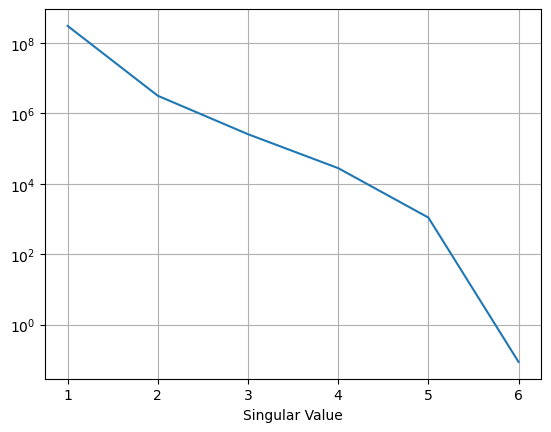

In [20]:
#visualizando os valores singulares
x = range(1, len(s)+1)
plt.semilogy(x,s) 
plt.xlabel("Singular Value")
plt.grid()
plt.show()

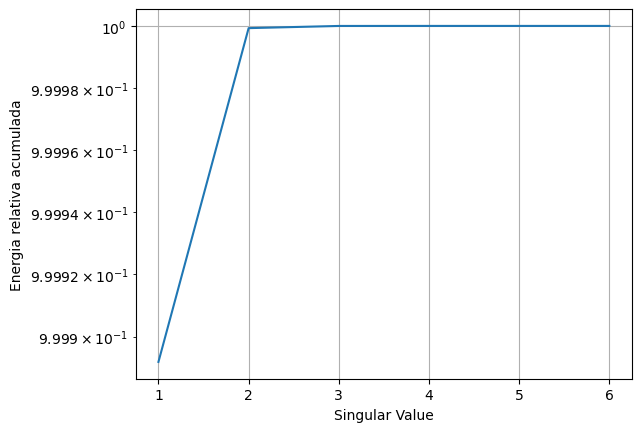

In [22]:
# calculando a energia relativa
x = range(1, len(s)+1)
plt.semilogy(x,np.cumsum(s**2) / np.sum(s**2))
plt.xlabel("Singular Value")
plt.ylabel("Energia relativa acumulada")
plt.grid()
plt.show()

#### Select order

In [27]:
r=3
Phir=Phi[:,0:r].copy()

In [29]:
Xr=Phir.T@X #projeção 
x0r=Phir.T@x0 #projeção

#usando derivada simples
Xrdot=Xr.copy()
Xrdot[:,0]=(Xr[:,0]-x0r)/dt
Xrdot[:,1:k]=(Xr[:,1:k]-Xr[:,0:k-1])/dt

## Resolvendo por Inferencia

In [32]:
Gamma=np.vstack((Xr,U))
O=np.zeros((r,r+p))

O,*_=np.linalg.lstsq(Gamma.T,Xrdot.T,rcond=None)
O=O.T

Ar=O[:,0:r]
Br=O[:,r:r+p]

## Calculando novos estados com as matrizes inferidas

In [35]:
Xrhat=np.zeros((r,k+1))
Xrhat[:,0]=x0r

mat1=np.eye(r)-dt*Ar
for i in range(1,k+1):
    mat2=Xrhat[:,i-1]+dt*Br@U[:,i-1]
    Xrhat[:,i]=np.linalg.solve(mat1,mat2)
Xhat=Phir@Xrhat

## Plotando os resultados

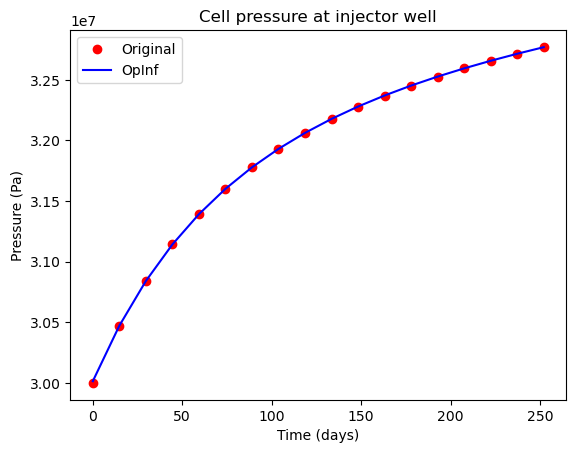

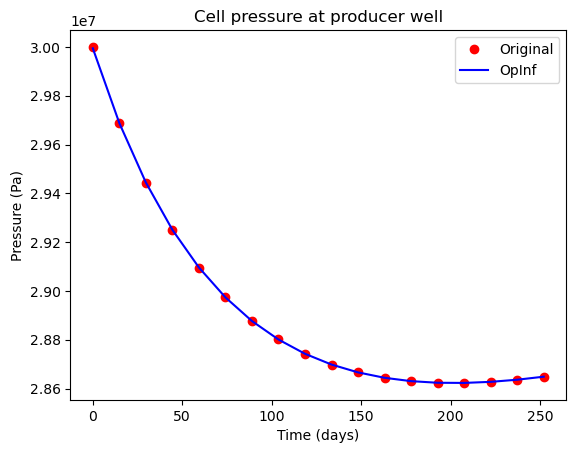

In [38]:

time=np.linspace(0,7*18*2,18)
plt.plot(time,Xorig[0,:],'ro',label="Original")
plt.plot(time,Xhat[0,:],'b',label="OpInf")
plt.title("Cell pressure at injector well")
plt.ylabel("Pressure (Pa)")
plt.xlabel("Time (days)")
plt.legend()
plt.show()

plt.plot(time,Xorig[-1,:],'ro',label="Original")
plt.plot(time,Xhat[-1,:],'b',label="OpInf")
plt.title("Cell pressure at producer well")
plt.ylabel("Pressure (Pa)")
plt.xlabel("Time (days)")
plt.legend()
plt.show()

# Histórico e Previsão

E se usarmos somente metade dos estados para inferir as matrizes? Vamos ver como fica:

In [42]:
kh=int(k/2)


#redução de ordem:
Phi,s,W = np.linalg.svd(X[:,:kh], full_matrices=False) #aplicando SVD

r=3
Phir=Phi[:,0:r].copy()

#projeção
Xr=Phir.T@X[:,:kh] #projeção 
x0r=Phir.T@x0 #projeção

#usando derivada simples
Xrdot=Xr.copy()
Xrdot[:,0]=(Xr[:,0]-x0r)/dt
Xrdot[:,1:kh]=(Xr[:,1:kh]-Xr[:,0:kh-1])/dt

#resolvendo
Gamma=np.vstack((Xr,U[:,:kh]))
O=np.zeros((r,r+p))

O,*_=np.linalg.lstsq(Gamma.T,Xrdot.T,rcond=None)
O=O.T

Ar=O[:,0:r]
Br=O[:,r:r+p]

#novos estados
Xrhat=np.zeros((r,k+1))
Xrhat[:,0]=x0r

mat1=np.eye(r)-dt*Ar

for i in range(1,k+1):
    mat2=Xrhat[:,i-1]+dt*Br@U[:,i-1]
    Xrhat[:,i]=np.linalg.solve(mat1,mat2)
Xhat=Phir@Xrhat

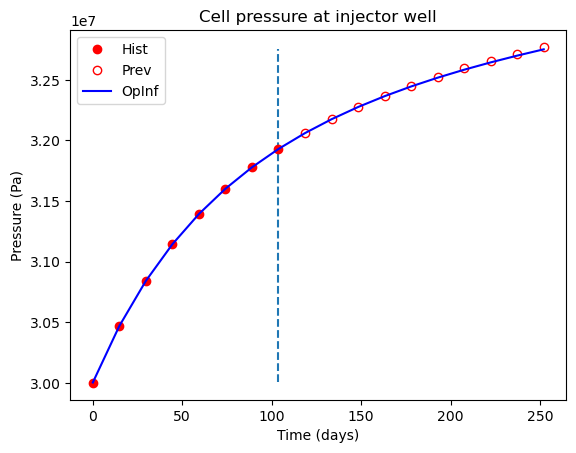

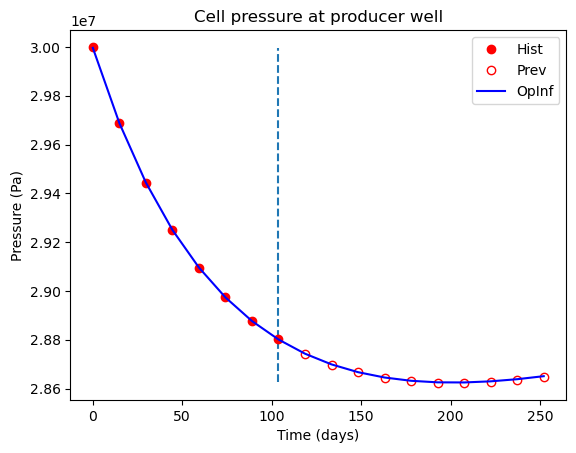

In [44]:
#plot

time=np.linspace(0,7*18*2,18)
plt.plot([time[kh-1],time[kh-1]],[np.min(Xhat[0,:]),np.max(Xhat[0,:])],"--")
plt.plot(time[:kh],Xorig[0,:kh],'ro',label="Hist")
plt.plot(time[kh:],Xorig[0,kh:],'ro',markerfacecolor='none',label="Prev")
plt.plot(time,Xhat[0,:],'b',label="OpInf")
plt.title("Cell pressure at injector well")
plt.ylabel("Pressure (Pa)")
plt.xlabel("Time (days)")
plt.legend()
plt.show()

plt.plot([time[kh-1],time[kh-1]],[np.min(Xhat[-1,:]),np.max(Xhat[-1,:])],"--")
plt.plot(time[:kh],Xorig[-1,:kh],'ro',label="Hist")
plt.plot(time[kh:],Xorig[-1,kh:],'ro',markerfacecolor='none',label="Prev")
plt.plot(time,Xhat[-1,:],'b',label="OpInf")
plt.title("Cell pressure at producer well")
plt.ylabel("Pressure (Pa)")
plt.xlabel("Time (days)")
plt.legend()
plt.show()